In [4]:
!pip install sklearn

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.models import load_model


from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.linear_model import LogisticRegression


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence

import time
import html
from nltk.tokenize import WordPunctTokenizer
import re

np.random.seed(0)

%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the re

from keras.preprocessing import sequence
Keras has provide very nice text processing functions.

Then we can format our text samples and labels into tensors that can be fed into a neural network. To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.

In [6]:
clean_data = pd.read_csv("clean_sentences.csv")

In [7]:
df = pd.DataFrame(clean_data)

In [8]:
df.shape

(1600000, 2)

In [9]:
df.columns

Index(['Sentences', 'Label'], dtype='object')

In [10]:
np.sum(df.isnull().any(axis=1))

3373

In [11]:
df[df.isnull().any(axis=1)].head()

,Sentences,Label
208,NaN,0
249,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0


In [12]:
df = df.dropna()

In [13]:
df.shape

(1596627, 2)

In [14]:
np.sum(df.isnull().any(axis=1))

0

In [15]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [16]:
df.head()

,Sentences,Label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [17]:
df["Sentences"][1]

'is upset that he can not update his facebook by texting it and might cry as result school today also blah'

In [18]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [19]:
X = df["Sentences"]
y = df["Label"]

In [20]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(1596627,)
(1596627,)


In [21]:
print("no. of classes :")
print(np.unique(y))

no. of classes :
[0 1]


In [22]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
1519745


Sentence length: 
Mean 60.23 words (32.842545)


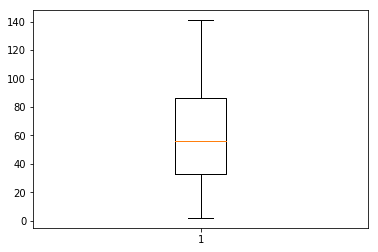

In [23]:
# Summarize sentence length
print("Sentence length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [24]:
df = df.dropna()

In [25]:
x = df["Sentences"]
y = df["Label"]

In [26]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

In [27]:
x_train.shape

(1564694,)

In [28]:
X.shape[0] - x_train.shape[0]

31933

In [29]:
x_validation_and_test.shape

(31933,)

In [30]:
x_validation.shape

(15966,)

In [31]:
x_test.shape

(15967,)

In [32]:
tvec1 = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tvec1.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [33]:
# saving the TfidfVectorizer
with open("tfidf_result_3.pkl", 'wb') as handle:
                     pickle.dump(tvec1, handle)


In [34]:
# feature_names = tfidf.get_feature_names()
# for col in response.nonzero()[1]:
#     print feature_names[col], ' - ', response[0, col]

In [35]:
x_train_tfidf = tvec1.transform(x_train)

In [36]:
x_train_tfidf

<1564694x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 29876579 stored elements in Compressed Sparse Row format>

In [37]:
x_validation_tfidf = tvec1.transform(x_validation).toarray()


In [38]:
x_validation_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
clf = LogisticRegression()
clf.fit(x_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
clf.score(x_train_tfidf, y_train)

0.8419857173351467

In [41]:
clf.score(x_validation_tfidf, y_validation)

0.8207440811724915

In [42]:
norm = Normalizer().fit(x_train_tfidf)
x_train_tfidf_norm = norm.transform(x_train_tfidf)
x_validation_tfidf_norm = norm.transform(x_validation_tfidf)

In [43]:
# evertime you call shuffle it will shuffle in same fashion
np.random.seed(32)

In [45]:
# between epochs if it see the same sentence it will learn the order of the sentence also 
# 48896.6875 -> counter
# Generatir : 32 * 1000000 
#     random shuffle: it does not learn the order of the sentences 
#         cause for every 48496 the epoch change and then shufflr happens
#         one epoch have 32 sentences each for counter 1.... 48896

In [46]:

def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0

In [47]:
x_train_tfidf.shape[0]

1564694

In [48]:
1564694/32

48896.6875

In [49]:
np.arange(np.shape(y_train)[0])

array([      0,       1,       2, ..., 1564691, 1564692, 1564693])

In [50]:
type(x_train_tfidf)

scipy.sparse.csr.csr_matrix

## Tetsing model accuracy and validation loss

In [41]:
# %%time
# # custom_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# from keras import optimizers

# custom_adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# model = Sequential()
# model.add(Dense(64, activation='relu', input_dim=100000))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=5, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

In [42]:
# %%time
# from keras import optimizers
# custom_adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=100000))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=2, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/2
# 48897/48896 [==============================] - 1222s 25ms/step - loss: 0.4094 - acc: 0.8139 - val_loss: 0.3901 - val_acc: 0.8264
# Epoch 2/2
# 48897/48896 [==============================] - 1220s 25ms/step - loss: 0.3753 - acc: 0.8341 - val_loss: 0.3909 - val_acc: 0.8281
# CPU times: user 45min 41s, sys: 9min 53s, total: 55min 34s
# Wall time: 40min 43s

In [44]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(128, activation='relu', input_dim=100000))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)


# Epoch 1/3
# 48897/48896 [==============================] - 1210s 25ms/step - loss: 0.4085 - acc: 0.8138 - val_loss: 0.3882 - val_acc: 0.8284
# Epoch 2/3
# 48897/48896 [==============================] - 1209s 25ms/step - loss: 0.3716 - acc: 0.8356 - val_loss: 0.3882 - val_acc: 0.8269
# Epoch 3/3
# 48897/48896 [==============================] - 1209s 25ms/step - loss: 0.3601 - acc: 0.8427 - val_loss: 0.3940 - val_acc: 0.8271
# CPU times: user 1h 7min 49s, sys: 14min 27s, total: 1h 22min 17s
# Wall time: 1h 29s

In [45]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(150, activation='relu', input_dim=100000))
# model_s.add(Dense(62, activation='relu'))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 1385s 28ms/step - loss: 0.4079 - acc: 0.8143 - val_loss: 0.3879 - val_acc: 0.8278
# Epoch 2/3
# 48897/48896 [==============================] - 1376s 28ms/step - loss: 0.3590 - acc: 0.8434 - val_loss: 0.3867 - val_acc: 0.8275
# Epoch 3/3
# 48897/48896 [==============================] - 1376s 28ms/step - loss: 0.3121 - acc: 0.8723 - val_loss: 0.4090 - val_acc: 0.8240
# CPU times: user 1h 13min 56s, sys: 16min 40s, total: 1h 30min 37s
# Wall time: 1h 8min 58s

In [46]:
# %%time
# model = Sequential()
# model.add(Dense(250, activation='relu', input_dim=100000))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 2080s 43ms/step - loss: 0.4084 - acc: 0.8137 - val_loss: 0.3965 - val_acc: 0.8199
# Epoch 2/3
# 48897/48896 [==============================] - 2077s 42ms/step - loss: 0.3586 - acc: 0.8445 - val_loss: 0.4009 - val_acc: 0.8212
# Epoch 3/3
#  1178/48896 [..............................] - ETA: 33:39 - loss: 0.3000 - acc: 0.8808

In [48]:
# %%time
# from keras import optimizers
# custom_adam = optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# model = Sequential()
# model.add(Dense(200, activation='relu', input_dim=100000))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=5, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)


# Epoch 1/5
# 48897/48896 [==============================] - 1711s 35ms/step - loss: 0.4119 - acc: 0.8129 - val_loss: 0.4114 - val_acc: 0.8177
# Epoch 2/5
# 48897/48896 [==============================] - 1707s 35ms/step - loss: 0.3655 - acc: 0.8405 - val_loss: 0.3968 - val_acc: 0.8208
# Epoch 3/5
# 48897/48896 [==============================] - 1707s 35ms/step - loss: 0.3306 - acc: 0.8636 - val_loss: 0.4019 - val_acc: 0.8187
# Epoch 4/5
# 48897/48896 [==============================] - 1717s 35ms/step - loss: 0.2878 - acc: 0.8891 - val_loss: 0.4182 - val_acc: 0.8142

In [1]:
# %%time
# model = Sequential()
# model.add(Dense(200, activation='relu', input_dim=100000))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 1715s 35ms/step - loss: 0.4117 - acc: 0.8128 - val_loss: 0.4071 - val_acc: 0.8186
# Epoch 2/3
# 48897/48896 [==============================] - 1717s 35ms/step - loss: 0.3655 - acc: 0.8398 - val_loss: 0.3979 - val_acc: 0.8227
# Epoch 3/3
# 48897/48896 [==============================] - 1713s 35ms/step - loss: 0.3309 - acc: 0.8625 - val_loss: 0.4021 - val_acc: 0.8190
# CPU times: user 1h 24min 25s, sys: 21min 15s, total: 1h 45min 41s
# Wall time: 1h 25min 46s

In [ ]:
# %%time

# from keras.callbacks import ModelCheckpoint

# model = Sequential()
# model.add(Dense(200, activation='relu', input_dim=100000))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # checkpointer = ModelCheckpoint(filepath="/home/ubuntu/Capstone/", save_best_only=True, monitor="val_loss")
# # history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
# #                     epochs=5, validation_data=(x_validation_tfidf, y_validation),
# #                     steps_per_epoch=x_train_tfidf.shape[0]/32, checkpointer=checkpointer)

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=5, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/5
# 48897/48896 [==============================] - 1717s 35ms/step - loss: 0.4141 - acc: 0.8120 - val_loss: 0.3993 - val_acc: 0.8195
# Epoch 2/5
# 48897/48896 [==============================] - 1721s 35ms/step - loss: 0.3776 - acc: 0.8338 - val_loss: 0.3985 - val_acc: 0.8192
# Epoch 3/5
# 48897/48896 [==============================] - 1722s 35ms/step - loss: 0.3626 - acc: 0.8445 - val_loss: 0.4004 - val_acc: 0.8194
# Epoch 4/5
# 48897/48896 [==============================] - 1724s 35ms/step - loss: 0.3478 - acc: 0.8553 - val_loss: 0.4019 - val_acc: 0.8181
# Epoch 5/5
# 48897/48896 [==============================] - 1718s 35ms/step - loss: 0.3340 - acc: 0.8642 - val_loss: 0.4076 - val_acc: 0.8178
# CPU times: user 2h 21min 1s, sys: 35min 10s, total: 2h 56min 12s
# Wall time: 2h 23min 23s

In [ ]:
# model = Sequential()
# model.add(Dense(200, activation='relu', input_dim=100000))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # checkpointer = ModelCheckpoint(filepath="/home/ubuntu/Capstone/", save_best_only=True, monitor="val_loss")
# # history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
# #                     epochs=5, validation_data=(x_validation_tfidf, y_validation),
# #                     steps_per_epoch=x_train_tfidf.shape[0]/32, checkpointer=checkpointer)

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=4, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/4
# 48897/48896 [==============================] - 1726s 35ms/step - loss: 0.4137 - acc: 0.8121 - val_loss: 0.4008 - val_acc: 0.8166
# Epoch 2/4
# 48897/48896 [==============================] - 1724s 35ms/step - loss: 0.3760 - acc: 0.8351 - val_loss: 0.3999 - val_acc: 0.8189
# Epoch 3/4
# 48897/48896 [==============================] - 1725s 35ms/step - loss: 0.3614 - acc: 0.8454 - val_loss: 0.4012 - val_acc: 0.8205
# Epoch 4/4
# 48897/48896 [==============================] - 1731s 35ms/step - loss: 0.3457 - acc: 0.8563 - val_loss: 0.4024 - val_acc: 0.8214

In [61]:
######### proper validationloss - 1 for 3 epoch
%%time
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=100000))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=3, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)



Epoch 1/3
48897/48896 [==============================] - 1728s 35ms/step - loss: 0.4141 - acc: 0.8121 - val_loss: 0.4015 - val_acc: 0.8170
Epoch 2/3
48897/48896 [==============================] - 1726s 35ms/step - loss: 0.3774 - acc: 0.8342 - val_loss: 0.4009 - val_acc: 0.8192
Epoch 3/3
48897/48896 [==============================] - 1725s 35ms/step - loss: 0.3625 - acc: 0.8448 - val_loss: 0.3998 - val_acc: 0.8213
CPU times: user 1h 25min 4s, sys: 21min 20s, total: 1h 46min 25s
Wall time: 1h 26min 20s


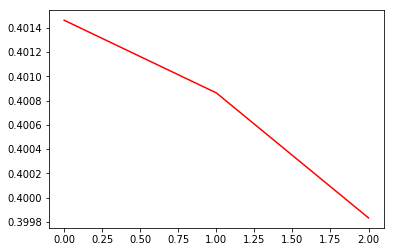

In [64]:
# plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation data loss", color='red')

In [51]:

# saving the model
model.save('nn-model_3.h5')  # creates a HDF5 file 'my_model.h5'


In [52]:
# loading the model
model = load_model('nn-model_3.h5')

In [53]:
# %%time
model.evaluate_generator(generator=batch_generator(x_train_tfidf, y_train, 32),steps=x_train_tfidf.shape[0]/32, 
                         max_queue_size=10, workers=1, use_multiprocessing=False)

# We can also achieve the above result using the below method
# evaluate_generator(self, generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)




[0.3416750641398911, 0.8634672338490711]

## Prediction

In [54]:
x_test_tfidf = tvec1.transform(x_test).toarray()

In [55]:
# pred = model.predict_generator(generator=batch_generator(x_test_tfidf, y_test, 32),steps=x_test_tfidf.shape[0]/32, max_queue_size=10, 
#                                workers=1, use_multiprocessing=False, verbose=1)

In [56]:
pred1 = model.predict(x_test_tfidf, verbose=1)

15967/15967 [==============================] - 8s 489us/step


In [57]:
pred1

array([[0.76124537],
       [0.9069183 ],
       [0.91954076],
       ...,
       [0.08315146],
       [0.83159447],
       [0.7580793 ]], dtype=float32)

In [58]:
pred_val = []
for i in pred1:
    if i > 0.5:
        pred_val1 = 1
        pred_val.append(pred_val1)
    else:
        pred_val1 = 0
        pred_val.append(pred_val1)

In [59]:
type(y_test)

pandas.core.series.Series

In [60]:
type(pred_val)

list

In [61]:
# Classification metrix
print(classification_report(y_test.tolist(), pred_val))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83      7970
          1       0.84      0.81      0.83      7997

avg / total       0.83      0.83      0.83     15967



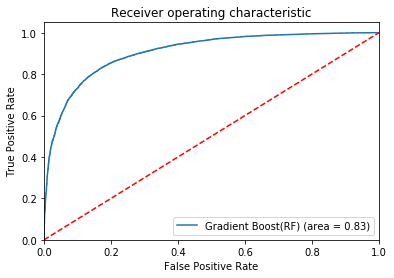

In [62]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(y_test.tolist(), pred_val)
fpr, tpr, thresholds = roc_curve(y_test.tolist(), model.predict_proba(x_test_tfidf))
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boost(RF) (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [63]:
df_test_view = pd.DataFrame()
df_test_view["Sentences"] = x_test
df_test_view["real-y-values"] = y_test
df_test_view["Predictions"] = pred1

In [64]:
df_test_view.head(20)

,Sentences,real-y-values,Predictions
1435744,well if you ever need ny tix we sell tix natio...,1,0.761245
1254910,whoohoo it going down you gotta check out it c...,1,0.906918
1510247,are you in seattle tomorrow if so let me know ...,1,0.919541
1395796,jade love the new photo gorgeous xxx,1,0.971236
969040,had the mother of all hangovers today super ev...,1,0.826093
824449,shall go and shower now and then go and pick t...,1,0.886612
1429481,wrong seb but thanks none the less,1,0.794089
598043,missin my baby,0,0.021154
465417,oh really that dissapointing,0,0.169575
1425459,soon soon sure we ll get em,1,0.924761


In [65]:
df_test_view[df_test_view["Predictions"] < 0.5].head(10)

,Sentences,real-y-values,Predictions
598043,missin my baby,0,0.021154
465417,oh really that dissapointing,0,0.169575
664066,damn papa was not included in the sexy follow ...,0,0.259266
698842,now the visitors are getting here now,0,0.462782
204941,homework alllll dayy then the ballet then more...,0,0.389986
1349987,up to my eyeballs in paper shreds yay summer c...,1,0.453971
1288541,it tuesday do not know why that particularly s...,1,0.269348
716919,cant beileve they beat us,0,0.215603
791681,first time did not have time to finish the test,0,0.143381
384,pepperoni rolls in called valentino they said ...,0,0.184681


In [66]:
df_test_view[df_test_view["Predictions"] > 0.5].head(10)

,Sentences,real-y-values,Predictions
1435744,well if you ever need ny tix we sell tix natio...,1,0.761245
1254910,whoohoo it going down you gotta check out it c...,1,0.906918
1510247,are you in seattle tomorrow if so let me know ...,1,0.919541
1395796,jade love the new photo gorgeous xxx,1,0.971236
969040,had the mother of all hangovers today super ev...,1,0.826093
824449,shall go and shower now and then go and pick t...,1,0.886612
1429481,wrong seb but thanks none the less,1,0.794089
1425459,soon soon sure we ll get em,1,0.924761
1459244,good morning lance how are you hope you are ha...,1,0.980104
1573286,night az sweet dreams talk to you later love ya,1,0.948202


## TEST

In [67]:
docs = ["I will not be able to come for your party, sorry"]

In [68]:

tok = WordPunctTokenizer()

mention1 = r'@[A-Za-z0-9]+'
mention2 = r'https?://[^ ]+'
combined_pat = r'|'.join((mention1, mention2))
www_pat = r'www.[^ ]+\.[^ ]+'
negations_dic = {"don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "wasn't":"was not", "weren't":"were not", "isn't":"is not", "aren't":"are not", 
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "dislike":"do not like"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
combined_pattern = re.compile(combined_pat)
www_pattern = re.compile(www_pat)
letters_pattern = re.compile("[^a-zA-Z]")

In [69]:
def clean_sentence(lower, higher, texts):
  
  results = []
  start_time = time.time()
  
  for i in range(lower, higher):
    
    if (i - lower + 1) % 100000 == 0:
      end_time = time.time() - start_time
      print(i - lower + 1, "Sentences cleaned , time in seconds:", end_time)
      start_time = time.time()
    text = texts[i]
    html_unescaped = html.unescape(text)
    try:
        bom_removed = html_unescaped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = html_unescaped
    stripped = combined_pattern.sub('', bom_removed)
    stripped = www_pattern.sub('', stripped)
    lower_case = stripped.lower()
    words = [negations_dic[x] if x in negations_dic else x for x in lower_case.split(' ')]
    neg_handled = " ".join(words).strip()
    letters_only = letters_pattern.sub(" ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    results.append(" ".join(words).strip())
    
  return results

In [70]:
print("Sentence Cleaning........\n")
# clean_Sentences_test = []
# clean_Sentences_test.extend(clean_sentence(0, len(docs), docs))
clean_doc = clean_sentence(0, len(docs), docs)
print("\nSentence Cleaning Completed........\n")

Sentence Cleaning........


Sentence Cleaning Completed........



In [71]:
clean_doc

['will not be able to come for your party sorry']

In [73]:
# load the tfidf
tfidf = pickle.load(open("tfidf_result_3.pkl", "rb" ) )

In [74]:
# pred_sentence = tvec1.transform(clean_doc).toarray()
pred_sentence = tfidf.transform(clean_doc).toarray()


In [75]:
pred_sentence.shape

(1, 100000)

In [76]:
# # loading the modelfrom keras.models import load_model
# model1 = load_model('nn-model_2.h5')

In [77]:
pred = model.predict(pred_sentence, verbose=1)

1/1 [==============================] - 0s 4ms/step


In [78]:
pred

array([[0.10864294]], dtype=float32)

Reading links : 

1. https://nlp.stanford.edu/projects/glove/
